In [3]:
import torch
import torch_geometric as pyg
import torch.nn as nn
from torch.nn import Parameter
import torch.nn.functional as F
from torch_geometric.utils import one_hot, scatter
from torch.utils.data import Dataset, DataLoader
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.datasets import QM9
from torch_geometric.nn import GCNConv, NNConv
from torch_geometric.nn.conv import GATv2Conv, GATConv, TransformerConv
from torch_geometric.nn.models import MLP
from torch_geometric.loader import DataLoader
from torch_geometric.transforms import NormalizeFeatures
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.pyplot as pltf
import pandas as pd
import rdkit
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem
from rdkit.Chem.rdchem import BondType, HybridizationType
import os
import matplotlib.pyplot as plt
import pickle
import time

dataset = QM9(root="./QM9")
#無向グラフの例
#edge_index = torch.tensor([[0,1,1,2],[1,0,2,1]], dtype=torch.long) # エッジの定義
#x = torch.tensor([[-1],[0],[1]], dtype=torch.float) # ノードの属性
#data = Data(x=x, edge_index=edge_index) # コンストラクタ
# Data(x=[3, 1], edge_index=[2, 4])

# Cheatsheet
# https://pytorch-geometric.readthedocs.io/en/latest/notes/cheatsheet.html

In [16]:
with open("results/ECFP_Dipole_4_1024", "rb") as f:
    result = pickle.load(f)
result

[0.7549693971410044,
 0.5258810459281046,
 0.42334398801759776,
 0.33663386644526394,
 0.2676507952913803,
 0.2168752993866231,
 0.17909847357777275,
 0.1515371296466163,
 0.13018745233290496,
 0.11450019037260824,
 0.10156003579119198,
 0.09092828723707345,
 0.08215253552807493,
 0.07534602743568328,
 0.06891527413871276,
 0.0644856414191259,
 0.05974203672705279,
 0.055921451283512266,
 0.0524036343821062,
 0.04968474026481879,
 0.04698213448618563,
 0.04507975037973188,
 0.04292402395186352,
 0.040919855127502666,
 0.03886705331416576,
 0.03730199340863301,
 0.035948192005908416,
 0.034491618399767,
 0.03330979410795313,
 0.03168201980461464,
 0.030708505135700042,
 0.029947337567925128,
 0.02850300041749049,
 0.028143440104455308,
 0.02727923747052591,
 0.026273169046534747,
 0.025544780150793277,
 0.02461622851149089,
 0.024098703728863136,
 0.023581528403934456,
 0.02271468855226151,
 0.022136972581923584,
 0.02137406213087631,
 0.021002260549487603,
 0.02027916083296518,
 0.0199

In [24]:
F.mse_loss(torch.tensor((1,2,3),dtype=float),torch.tensor((1,4,4),dtype=float))

tensor(1.6667, dtype=torch.float64)

In [37]:
import math
math.sqrt(result[0])

NameError: name 'result' is not defined

In [32]:
#類似度予測

def ECFPGen(smiles, radius=4, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    morgan = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    return morgan

def npECFP(morgan):
    array = np.zeros(morgan.GetNumBits())
    rdkit.DataStructs.ConvertToNumpyArray(morgan, array)
    return np.nonzero(array)

# ECFP
# 回帰の手法(https://chemrxiv.org/engage/chemrxiv/article-details/60c75208bdbb899737a3a1c2)
# MLP, kNN, KRR, SVM, RF, LightGBM, GBRT
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import random
import math
from sklearn.metrics import r2_score
random.seed(0)

df = pd.read_csv("./qm9_dataset.csv")

In [2]:
# ECFP
# 回帰の手法(https://chemrxiv.org/engage/chemrxiv/article-details/60c75208bdbb899737a3a1c2)
# MLP, kNN, KRR, SVM, RF, LightGBM, GBRT

#ECFP = [list(ECFPGen(smiles)) for smiles in df["smiles"].values]
with open("QM9_ECFP", "rb") as f:
    ECFP = pickle.load(f)
# 説明変数と説明変数
X = [np.array(i) for i in ECFP]
Y = df["alpha"].values # 双極子モーメント
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#1m54.2でできる

NameError: name 'pd' is not defined

In [11]:
radius = 2
nBits = 2048
ECFP = [list(ECFPGen(smiles, radius=radius, nBits=nBits)) for smiles in df["smiles"].values]

In [34]:
for 
hidden_layer_sizes = (100,)
mlp = MLPRegressor(max_iter=10000, activation="relu", solver="adam", verbose=True, hidden_layer_sizes=hidden_layer_sizes, early_stopping=True)
mlp.loss = "squared_error"
X = [np.array(i) for i in ECFP]
Y = df["alpha"].values #alpha:分極率 idx=1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
r2 = []
start = time.time()
mlp.fit(X_train,Y_train)
end = time.time()
time_diff = end - start
with open(f"results/ECFP_alpha_{radius}_{nBits}_{hidden_layer_sizes}", "wb") as f:
    rmse = [math.sqrt(i*2) for i in mlp.loss_curve_] #scikit-learnのMSEは2で割られているので、2をかけてから平方根を取る。
    result = [rmse, mlp.validation_scores_, time_diff]
    pickle.dump(mlp.loss_curve_, f)


Iteration 1, loss = 581.53706374
Validation score: -0.247182
Iteration 2, loss = 32.07979582
Validation score: 0.205536
Iteration 3, loss = 24.30612155
Validation score: 0.301358
Iteration 4, loss = 21.94888746
Validation score: 0.355603
Iteration 5, loss = 20.29943940
Validation score: 0.401968
Iteration 6, loss = 18.72326213
Validation score: 0.457337
Iteration 7, loss = 16.21661796
Validation score: 0.552198
Iteration 8, loss = 12.70165132
Validation score: 0.649496


/home/higuchi/mambaforge/envs/torchenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


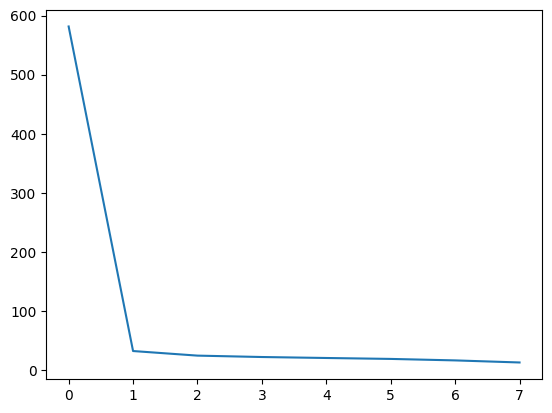

In [39]:
#仮word用
with open("results/ECFP_alpha_2_2048_(100,)", "rb") as f:
    test = pickle.load(f)
plt.plot(test)

In [35]:
mlp.validation_scores_

[-0.24718238183448138,
 0.20553624723876562,
 0.3013577295413743,
 0.35560322143194345,
 0.40196792394190206,
 0.4573367435465394,
 0.5521981531675463,
 0.6494963544839556]

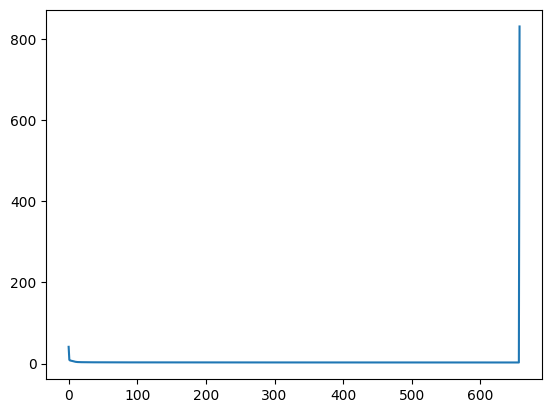

In [30]:
plt.plot(mlp.loss_curve_)

In [31]:
mlp.loss_curve_

[41.332260841125844,
 9.253041037596455,
 7.774542167845601,
 7.22113449508434,
 6.925257883885077,
 6.574595459266994,
 6.185338698514044,
 5.7203862932563885,
 5.227872203251129,
 4.755588329112674,
 4.380516226115726,
 4.118782087140771,
 3.9376012997801464,
 3.8052510160807365,
 3.7097364731547775,
 3.6386088550162996,
 3.5805889225188934,
 3.5320462827930923,
 3.493693867969131,
 3.4593303722255144,
 3.427472758266009,
 3.3993649428717867,
 3.377161120583056,
 3.355387808196992,
 3.334563602068595,
 3.316529344610288,
 3.3004407360407715,
 3.2871856446872068,
 3.271102767883358,
 3.259451253180907,
 3.2480761367015383,
 3.235460094345634,
 3.221325572043916,
 3.2115736949874694,
 3.200076339710851,
 3.194678485969184,
 3.184324915302172,
 3.1754030434302423,
 3.1648268042140995,
 3.1584227481047344,
 3.1532293746578333,
 3.1473948891649717,
 3.138079039227738,
 3.1298950468495113,
 3.129959481678678,
 3.120580528972171,
 3.1157564462239935,
 3.1105329080210056,
 3.104473504414136,

In [8]:
mlp = MLPRegressor(max_iter=1000, activation="relu", solver="adam", verbose=True, hidden_layer_sizes=hidden_layer_sizes)
mlp.loss 

'squared_error'

In [15]:
mlp.score(X_test,Y_test)

0.7526752245422885

In [51]:
mlp.score()

TypeError: RegressorMixin.score() missing 2 required positional arguments: 'X' and 'y'

TypeError: list.count() takes exactly one argument (0 given)

In [30]:
mlp = MLPRegressor(max_iter=10000, activation="relu", solver="adam", verbose=True, hidden_layer_sizes=(100,100))


In [ ]:
with open("results/ECFP_Dipole_2_22")

In [40]:
with open("results/ECFP_Dipole_6_2048", "rb") as f:
    test = pickle.load(f)
test

[0.7358804574041745,
 0.5027598216023492,
 0.4048464232582225,
 0.32131983580670886,
 0.2571448085987245,
 0.2082152817909352,
 0.17140689485777466,
 0.14493100514163731,
 0.12429132858163466,
 0.10790171045920356,
 0.09508175045970438,
 0.08503357051125295,
 0.07647326190441184,
 0.06908736190112823,
 0.06389540771923595,
 0.05890218367973595,
 0.054587610416104715,
 0.05173371211173319,
 0.048063734165877225,
 0.04511863307380085,
 0.04318921424900014,
 0.04124397413974403,
 0.03910365244625134,
 0.03720496465669037,
 0.03603510861041594,
 0.034676303454308,
 0.033155915144484766,
 0.03204129150098049,
 0.0304936250658086,
 0.029531188950549733,
 0.028670449175493544,
 0.02734130630772425,
 0.026207421230787623,
 0.026111303579746777,
 0.025301557045952078,
 0.02413884025673116,
 0.023880908083979448,
 0.023046258473110773,
 0.02210988478668418,
 0.02176290456014009,
 0.021210568614976586,
 0.020716124321804728,
 0.02007628697400676,
 0.01973294985104709,
 0.01939769913228593,
 0.018

In [15]:
mlp.loss_curve_

[0.7212349688603316,
 0.4924714119535072,
 0.3985999208704326,
 0.31731232789205394,
 0.252247227542993,
 0.2034815230259134,
 0.16854704065890996,
 0.14268826020542905,
 0.12250768413503137,
 0.10625390320547484,
 0.09488068803553656,
 0.08432461336949365,
 0.07610654692776328,
 0.06927764140194327,
 0.06300736611895061,
 0.058749097281114236,
 0.05426655092195708,
 0.05046753198162567,
 0.047528318433161465,
 0.044585887511101416,
 0.042295489663074934,
 0.040110069159544855,
 0.038093316894755896,
 0.03629375489557763,
 0.03464788015827229,
 0.03326209625057759,
 0.03187052817997083,
 0.030942121430672632,
 0.029797125495898157,
 0.028921119050303607,
 0.02801924034814353,
 0.026479150507085693,
 0.02586889376848087,
 0.02561227483039702,
 0.024699789604930047,
 0.023967034268906083,
 0.022989941841608096,
 0.02219969095173206,
 0.021866385209806816,
 0.021160211230047618,
 0.02094596889340653,
 0.02014500279458145,
 0.019044652336483853,
 0.01891095064668913,
 0.019095343659417657,

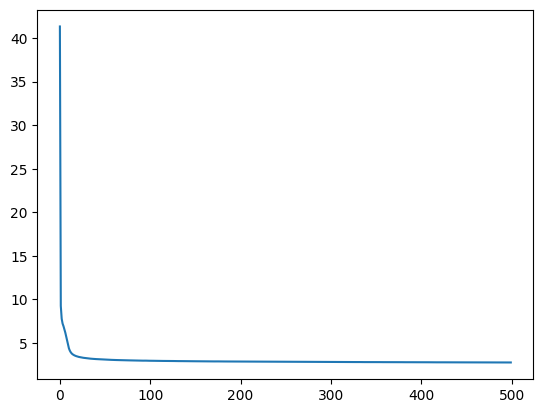

In [17]:
plt.plot(mlp.loss_curve_[:500])
plt.show()

In [ ]:
# Pytorch ECFP
X_tensor = torch.tensor(X)
Y_tensor = torch.tensor(Y)

In [ ]:
# SVR
#SVM = LinearSVR(loss="squared_epsilon_insensitive", random_state=0, max_iter=10000)
SVM = SVR(kernel="linear", max_iter=10000)
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
mean_squared_error(Y_test, Y_pred, squared=False)
error = mean_squared_error(Y_test, Y_pred, squared=False)
error


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=64, max_iter=1000, activation="relu", solver="adam", random_state=0)
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)
error = mean_squared_error(Y_test, Y_pred, squared=False)
error

In [ ]:
error_mae = mean_absolute_error(Y_test, Y_pred)
error_mae

In [ ]:
import matplotlib.pyplot as plt
errors = []
for i in range(1, 10):
    train_X = X[:80]
    train_Y = Y[:80] 
    test_X = X[80:]
    test_Y = Y[80:]
    hidden_layer_sizes = 2**i
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=100000, activation="relu", solver="adam", random_state=0)
    mlp.fit(train_X,train_Y)
    pred_Y = mlp.predict(test_X)
    error = mean_squared_error(test_Y, pred_Y, squared=False)
    errors.append((i,error))

In [ ]:
plt.plot([i[0] for i in errors], [i[1] for i in errors]) 
plt.xlabel("number of hidden layers(2^x)")
plt.ylabel("RMSE")
plt.title("max_iter=100000, adam, relu")

In [ ]:
df = pd.read_csv("./qm9_dataset.csv")
list(df["smiles"])
atomrefs

In [ ]:
dataset = MyFirstDataset(root="MyFirstDataset")

In [ ]:
for name, i in df.iterrows():
    target = [float(x) for x in i.values[2:]]
    target = torch.tensor(target, dtype=torch.float)
    #target = torch.cat([target[:, 3:], target[:, 3:]], dim=0)
    #target = target * conversion.view(1, -1)


https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html

QM9の属性

x:ノードの特徴量(原子数×特徴量数=11)

y:ラベル(ラベル数)

z:原子番号(原子数)

edge_attr:エッジ特徴量=結合次数(エッジ数×結合次数)

edge_index:エッジリスト(2×エッジ数)

pos:3Dグリッドでの各原子の位置(原子数×3)

正則化の手法
・L1正則化(重み減衰)
・L2正則化(重み減衰)
・Dropout
・ラベル平滑化
・バッチ正則化

In [10]:
#https://www.graphcore.ai/posts/getting-started-with-pytorch-geometric-pyg-on-graphcore-ipus

# GCN
#NNでは64層くらい使ってる場合もある
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv1 = GCNConv(dataset.num_node_features, 32)
        self.conv1 = GCNConv(dataset.num_node_features, 32)
        self.conv2 = GCNConv(32, 32)
        self.linear1 = nn.Linear(16,1)
        self.out = nn.Linear(32, 1)
        #self.conv3 = GCNConv(32, dataset.num_classes) #num_classes:ラベルの数
    #バッチノルム(正則化)
    def forward(self, data):
        x, batch, edge_index, edge_attr = data.x, data.batch, data.edge_index, data.edge_attr
        # Dropout:一定割合のノードを不活性化(0になる)させ、過学習を緩和する。pはゼロになるノードの確率で、0.5がデフォルト。
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = torch_geometric.nn.global_add_pool(x, batch) #これが必要やった
        #x = F.dropout(x, p=0.2, training=self.training) # 取ってみる
        x = self.out(x)
        return x

class GCN_N(torch.nn.Module):
    def __init__(self, layer:int, dim=32, dataset=dataset):
        super().__init__()
        self.layer = layer
        self.dataset = dataset
        self.dim = dim
        self.conv1 = GCNConv(self.dataset.num_node_features, self.dim, improved=True)
        self.convn = GCNConv(self.dim, self.dim, improved=True)
        self.out = pyg.nn.Linear(self.dim, 1)

    def forward(self, data):
        x, batch, edge_index, edge_attr = data.x, data.batch, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        for i in range(2, self.layer + 1):
            x = self.convn(x, edge_index)
            x = F.relu(x)
        x = pyg.nn.global_add_pool(x, batch) 
        #x = F.dropout(x, p=0.2, training=self.training)
        x = self.out(x)
        return x

class GATv2_N(torch.nn.Module):
    def __init__(self, layer:int, dim=32):
        super().__init__()
        self.layer = layer
        self.dim = dim
        self.conv1 = GATv2Conv(dataset.num_node_features, self.dim)
        self.convn = GATv2Conv(self.dim, self.dim)
        self.out = pyg.nn.Linear(self.dim, 1)

    def forward(self, data):
        x, batch, edge_index, edge_attr = data.x, data.batch, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        for i in range(1, self.layer):
            x = self.convn(x, edge_index, edge_attr)
            x = F.relu(x)
        x = pyg.nn.global_add_pool(x, batch) 
        #x = F.dropout(x, p=0.2, training=self.training)
        x = self.out(x)
        return x

class GAT_N(torch.nn.Module):
    def __init__(self, layer:int, dim=32):
        super().__init__()
        self.layer = layer
        self.dim = dim
        self.conv1 = GATConv(dataset.num_node_features, self.dim)
        self.convn = GATConv(self.dim, self.dim)
        self.out = pyg.nn.Linear(self.dim, 1)

    def forward(self, data):
        x, batch, edge_index, edge_attr = data.x, data.batch, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        for i in range(2, self.layer + 1):
            x = self.convn(x, edge_index, edge_attr)
            x = F.relu(x)
        x = pyg.nn.global_add_pool(x, batch) 
        #x = F.dropout(x, p=0.2, training=self.training)
        x = self.out(x)
        return x

class trans_N(torch.nn.Module):
    def __init__(self, layer:int, dim=32):
        super().__init__()
        self.layer = layer
        self.dim = dim
        self.conv1 = GCNConv(dataset.num_node_features, self.dim, improved=True)
        self.convn = GCNConv(self.dim, self.dim, improved=True)
        self.out = pyg.nn.Linear(self.dim, 1)

    def forward(self, data):
        x, batch, edge_index, edge_attr = data.x, data.batch, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_attr[0])
        x = F.relu(x)
        for i in range(2, self.layer + 1):
            x = self.convn(x, edge_index, edge_attr[0])
            x = F.relu(x)
        x = pyg.nn.global_add_pool(x, batch) 
        #x = F.dropout(x, p=0.2, training=self.training)
        x = self.out(x)
        return x

In [4]:
class GNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1_net = torch.nn.Sequential(nn.Linear(dataset.num_edge_features, 32),
                                            nn.ReLU(),
                                            nn.Linear(32, dataset.num_node_features*32))
        self.conv2_net = torch.nn.Sequential(nn.Linear(dataset.num_edge_features, 32),
                                            nn.ReLU(),
                                            nn.Linear(32, 32*16))        
        self.conv1 = NNConv(dataset.num_node_features, 32, self.conv1_net)
        self.conv2 = NNConv(32, 16, self.conv2_net)
        self.linear1 = torch.nn.Linear(16, 32)
        self.out = nn.Linear(32,1)
    def forward(self, data):
        x, edge_index, edge_attr, batch = data.x, data.edge_index, data.edge_attr, data.batch
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = pyg.nn.global_add_pool(x, batch)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.out(x)
        return x

class GNNModel_N(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1_net = torch.nn.Sequential(nn.Linear(dataset.num_edge_features, 32),
                                            nn.ReLU(),
                                            nn.Linear(32, dataset.num_node_features*32))
        self.conv2_net = torch.nn.Sequential(nn.Linear(dataset.num_edge_features, 32),
                                            nn.ReLU(),
                                            nn.Linear(32, 32*16))        
        self.conv1 = NNConv(dataset.num_node_features, 32, self.conv1_net)
        self.conv2 = NNConv(32, 16, self.conv2_net)
        self.linear1 = torch.nn.Linear(16, 32)
        self.out = nn.Linear(32,1)
    def forward(self, data):
        x, edge_index, edge_attr, batch = data.x, data.edge_index, data.edge_attr, data.batch
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = torch_geometric.nn.global_add_pool(x, batch)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [11]:
#データの分割(total: 130831)
num_train, num_val = int(len(dataset)*0.8), int(len(dataset)*0.1)
num_test = len(dataset) - (num_train + num_val)
batch_size = 32

# 乱数の固定
device = torch.device("cpu")
seed = 0
pyg.seed_everything(seed=seed)
"""
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
"""
train_set, valid_set, test_set = random_split(dataset, [num_train, num_val, num_test])

#Dataloaderの生成
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, worker_init_fn=pyg.seed_everything(seed))
valid_loader = DataLoader(valid_set, batch_size=batch_size, worker_init_fn=pyg.seed_everything(seed))
test_loader = DataLoader(test_set, batch_size=batch_size, worker_init_fn=pyg.seed_everything(seed))

#layer = 2
#dim = 32

In [65]:
# 学習したいラベルのインデックス位置
from math import sqrt
from sklearn.metrics import r2_score

epoch_num = 50
target_idx = 1 # 0はじまり 0→分極率
#targets = ["Isotropic polarizability", "HOMO", "LUMO", "E_Gap", "Electronic spatial extent", "ZPVE", "U_0", "U", "H", "G", "Cv", "U_0 ATOM", "U ATOM", "H ATOM", "G ATOM", "A", "B", "C"]
#target_name = targets[target_idx]
start = time.time() #時間計測開始
results = []

mse = F.mse_loss
mae = F.l1_loss #mae

def train(criterion):
    # 学習前に毎回実行する
    model = GCN_N(layer=layer,dim=dim)
    # Optimizerの初期化
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01, weight_decay=5e-4)
    for epoch in range(epoch_num):
        # train
        model.train()
        train_loss = 0
        total_graphs = 0
        for batch in train_loader:
            batch = batch.to("cpu")
            optimizer.zero_grad()
            prediction = model(batch)
            loss = criterion(prediction, batch.y[:, target_idx].unsqueeze(1))
            loss.backward()
            train_loss += loss.item()
            total_graphs += batch.num_graphs
            optimizer.step()
        train_loss /=  len(train_loader) #損失の平均(batchあたり) #平均を取ってからルート
        if criterion == mse:
            train_loss = sqrt(train_loss)
        else:
            pass
    
        # validation
        model.eval()
        valid_loss = 0
        total_graphs = 0
        with torch.inference_mode(): # 自動微分無効。torch.no_grad()よりさらに高速化
            for batch in valid_loader:
                prediction = model(batch)
                loss = criterion(prediction, batch.y[:, target_idx].unsqueeze(1))
                valid_loss += loss.item()
                total_graphs += batch.num_graphs
        valid_loss /= len(valid_loader)
        if criterion == mse:
            valid_loss = sqrt(valid_loss)
        else:
            pass

        print(f"Epoch {epoch+1} | train_loss:{train_loss}, valid_loss:{valid_loss}")
        results.append({"Epoch":epoch+1, "train_loss":train_loss, "valid_loss":valid_loss})
    return results

#for layer in range(2,6):
#    for i in range(5,8):
#        dim = 2**i
for layer in range(4,5):
    for dim in [128]:    
        print("RMSE")
        start = time.time()
        results_mse = train(criterion=mse)
        end = time.time()
        time_diff = end - start
        results_mse = (results_mse, time_diff)
        #print("")
        #print("MAE")
        #results_mae = train(criterion=mae)

        #results = [{"Epoch":i + 1, "train_loss_RMSE":results_mse[i]["train_loss"], "valid_loss_RMSE":results_mse[i]["valid_loss"], "accuracy":accuracy} for i in range(epoch_num)]
        target_name = "dipole"
        with open(f"./results/GCN_{target_name}_{layer}_{dim}_{epoch_num}", "wb") as f: #ファイル名：ターゲット、層数、隠れ層数、エポック数 (can be loaded by pickle)
            #pickle.dump(results, f)
            pickle.dump(results_mse, f)


RMSE
Epoch 1 | train_loss:3.799780875091046, valid_loss:2.1569826146665734
Epoch 2 | train_loss:2.4339145714010018, valid_loss:2.208805357861647
Epoch 3 | train_loss:2.2565753938634185, valid_loss:2.0834259701087148
Epoch 4 | train_loss:2.0575890960778933, valid_loss:1.8582548561010794
Epoch 5 | train_loss:1.9223933295540754, valid_loss:2.0288148364836767
Epoch 6 | train_loss:1.7832825663460723, valid_loss:1.5883344583295784
Epoch 7 | train_loss:1.7702614473837073, valid_loss:1.508107812214264
Epoch 8 | train_loss:1.8293371294116756, valid_loss:1.967834604642663
Epoch 9 | train_loss:1.8121741930010018, valid_loss:1.8082911088966638
Epoch 10 | train_loss:1.6970285474308497, valid_loss:2.024646382539038
Epoch 11 | train_loss:1.6917722058967741, valid_loss:1.460263867806147
Epoch 12 | train_loss:1.6921728334531743, valid_loss:1.5482684176340606
Epoch 13 | train_loss:1.668588287009484, valid_loss:1.8389685208180264
Epoch 14 | train_loss:1.669173691781292, valid_loss:1.516418561732652
Epoch

In [73]:
with open("./results/GCN_dipole_4_128_50","rb") as f:
    a=pickle.load(f)
a

([{'Epoch': 1,
   'train_loss': 3.799780875091046,
   'valid_loss': 2.1569826146665734},
  {'Epoch': 2,
   'train_loss': 2.4339145714010018,
   'valid_loss': 2.208805357861647},
  {'Epoch': 3,
   'train_loss': 2.2565753938634185,
   'valid_loss': 2.0834259701087148},
  {'Epoch': 4,
   'train_loss': 2.0575890960778933,
   'valid_loss': 1.8582548561010794},
  {'Epoch': 5,
   'train_loss': 1.9223933295540754,
   'valid_loss': 2.0288148364836767},
  {'Epoch': 6,
   'train_loss': 1.7832825663460723,
   'valid_loss': 1.5883344583295784},
  {'Epoch': 7,
   'train_loss': 1.7702614473837073,
   'valid_loss': 1.508107812214264},
  {'Epoch': 8,
   'train_loss': 1.8293371294116756,
   'valid_loss': 1.967834604642663},
  {'Epoch': 9,
   'train_loss': 1.8121741930010018,
   'valid_loss': 1.8082911088966638},
  {'Epoch': 10,
   'train_loss': 1.6970285474308497,
   'valid_loss': 2.024646382539038},
  {'Epoch': 11,
   'train_loss': 1.6917722058967741,
   'valid_loss': 1.460263867806147},
  {'Epoch': 12

In [17]:
results_mse

[{'Epoch': 1,
  'train_loss_RMSE': 1.309704071787473,
  'valid_loss_RMSE': 1.2296099406769951},
 {'Epoch': 2,
  'train_loss_RMSE': 1.2217893600422978,
  'valid_loss_RMSE': 1.2276357297157248},
 {'Epoch': 3,
  'train_loss_RMSE': 1.2077075167171785,
  'valid_loss_RMSE': 1.1991930329111748},
 {'Epoch': 4,
  'train_loss_RMSE': 1.199772980709421,
  'valid_loss_RMSE': 1.21047771220476},
 {'Epoch': 5,
  'train_loss_RMSE': 1.1888698123898245,
  'valid_loss_RMSE': 1.1837441034624412},
 {'Epoch': 6,
  'train_loss_RMSE': 1.1867064934371074,
  'valid_loss_RMSE': 1.1928916204546156},
 {'Epoch': 7,
  'train_loss_RMSE': 1.1786985627374724,
  'valid_loss_RMSE': 1.1768997137012518},
 {'Epoch': 8,
  'train_loss_RMSE': 1.1807449813929505,
  'valid_loss_RMSE': 1.2215823209872976},
 {'Epoch': 9,
  'train_loss_RMSE': 1.1775181536813815,
  'valid_loss_RMSE': 1.2774895765572465},
 {'Epoch': 10,
  'train_loss_RMSE': 1.1796164567712693,
  'valid_loss_RMSE': 1.19750570731699},
 {'Epoch': 11,
  'train_loss_RMSE':

In [17]:
with open("./results/GCN_dipole_2_32_2", "rb") as f:
    test1 = pickle.load(f)
test1

[{'Epoch': 1,
  'train_loss_RMSE': 1.3171492476344866,
  'valid_loss_RMSE': 1.2604073345344995,
  'train_loss_MAE': 1.3171492476344866,
  'valid_loss_MAE': 1.2604073345344995},
 {'Epoch': 2,
  'train_loss_RMSE': 1.2160129461851614,
  'valid_loss_RMSE': 1.274314754044402,
  'train_loss_MAE': 1.2160129461851614,
  'valid_loss_MAE': 1.274314754044402}]

In [ ]:
newarray = np.ndarray()

In [ ]:
# ECFP
# https://qiita.com/kimisyo/items/55a01e27aa03852d84e9
# https://pubs.acs.org/doi/10.1021/acsomega.1c01266
# https://pubs.acs.org/doi/10.1021/acs.jcim.0c01208

import pandas as pd
df = pd.read_csv("./qm9_dataset.csv")

from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import numpy as np

def ECFPGen(smiles, radius=3, nBits=12):
    mol = Chem.MolFromSmiles(smiles)
    bit_morgan1 = {}
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits, bitInfo=bit_morgan1)
    bit1 = list(fp1)
    return bit1

df["ECFP"] =  [ECFPGen(smiles, radius=2, nBits=2048) for smiles in df["smiles"]]

In [ ]:
# cross-validation
from sklearn.model_selection import KFold
from math import sqrt

target_idx = 1
num_epochs = 10
fold = KFold(n_splits=3, random_state=0, shuffle=True)

for f, (train_idx,valid_idx) in enumerate(fold.split(np.arange(len(dataset)))):
    
    print(f"Fold {f + 1}")

    for epoch in range(num_epochs):
    # train
        model.train()
        train_loss = 0
        total_graphs = 0
        for batch in train_loader:
            batch = batch.to("cpu")
            optimizer.zero_grad()
            prediction = model(batch)
            #loss = torch.sqrt(criterion(prediction, batch.y[:, target_idx].unsqueeze(1)))
            loss = criterion(prediction, batch.y[:, target_idx].unsqueeze(1))
            loss.backward()
            train_loss += loss.item()
            total_graphs += batch.num_graphs
            optimizer.step()
        train_loss /=  len(train_loader) #損失の平均(batchあたり) #平均を取ってからルート
        train_loss = sqrt(train_loss)

        # validation
        model.eval()
        valid_loss = 0
        total_graphs = 0
        with torch.inference_mode(): # 自動微分無効。torch.no_grad()よりさらに高速化
            for batch in valid_loader:
                prediction = model(batch)
                #loss = torch.sqrt(criterion(prediction, batch.y[:, target_idx].unsqueeze(1)))
                loss = criterion(prediction, batch.y[:, target_idx].unsqueeze(1))
                valid_loss += loss.item()
                total_graphs += batch.num_graphs
        valid_loss /= len(valid_loader)
        valid_loss = sqrt(valid_loss)

        print(f"Epoch {epoch+1} | train_loss:{train_loss}, valid_loss:{valid_loss}")
            

In [10]:
with open("pickle_test","rb") as f:
    pickle_test = pickle.load(f)
pickle_test


[7.5111434600112155,
 3.4445386044421165,
 3.4405643966218706,
 3.437776689995181,
 3.418383062939326]

隠れ層の数は層によって変えるべき？

edge_attr:多次元

edge_weight:一次元

GCNはedge_weightのため、QM9のedge_attrが使えない。そのため、edge_attrなしでの計算になる

GATはedge_attrが使える。edge_attrの追加によって悪化した。
GAT2はedge_attrが使えない。






In [ ]:
# 具体的な予[測値
[[prediction[i].item(),batch.y[:, target_idx][i].item()] for i in range(len(prediction))]

In [ ]:
#2層
epoch = [i for i in range(1, 51)] 

plt.subplot(121)
plt.plot(epoch, [i["train_loss"] for i in dim16])
plt.plot(epoch, [i["valid_loss"] for i in dim16])
plt.title("dim=16")
plt.ylim(0,14)
plt.subplot(122)
plt.plot(epoch, [i["train_loss"] for i in dim32])
plt.plot(epoch, [i["valid_loss"] for i in dim32])
plt.title("dim=32")
plt.ylim(0,14)

In [ ]:
dim16

In [ ]:
# お前はもう必要ない
import re
def parser(text):
    text = text.split("\n")
    loss = [{"train_loss":re.sub("train_loss:", "", i.split("| ")[1].split(",")[0]), "valid_loss":re.sub(" valid_loss:", "", i.split("| ")[1].split(",")[1])}for i in text if i]
    train_loss = [float(i["train_loss"]) for i in loss]
    valid_loss = [float(i["valid_loss"]) for i in loss]
    return np.array([train_loss, valid_loss])
loss_two = parser(two_layers)
loss_three = parser(theree_layers)

In [ ]:
# 2層
import matplotlib.pyplot as plt
import math
epoch = [i for i in range(1, len(loss_two[0]) + 1)]
plt.subplot(1,2,1) 
loss_two = np.log(loss_two)
plt.plot(epoch, loss_two[0])
plt.subplot(1,2,2)
plt.plot(epoch, loss_two[1])

In [ ]:
# 3層
import matplotlib.pyplot as plt
epoch = [i for i in range(1, len(loss_three[0]) + 1)]
loss_three = np.log(loss_three)
plt.subplot(1,2,1)
plt.plot(epoch, loss_three[0])
plt.subplot(1,2,2)
plt.plot(epoch, loss_three[1])

In [ ]:
model.eval() # 評価開始
predictions = []
real = []
for batch in test_loader:
    output = model(batch.to("cpu"))
    predictions.append(output.detach().cpu().numpy())
    real.append(batch.y[:,target_idx].detach().cpu().numpy())
real = np.concatenate(real)
predictions = np.concatenate(predictions)

plt.scatter(real, predictions)
plt.ylabel('Predicted')
plt.xlabel('real')
plt.show()


Creating Your Own Datasets

https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_dataset.html

https://qiita.com/maskot1977/items/4aa6322459eb3a78955f


Datasets

https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html


TORCH.NN.FUNCTIONAL

https://pytorch.org/docs/stable/nn.functional.html


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# エタンのグラフ構造の作成
mol = Chem.MolFromSmiles("CC")
mol = Chem.AddHs(mol)
atoms = mol.GetAtoms()
bonds = mol.GetBonds()
bonds[0].GetEndAtomIdx()

edge_list = []
for bond in bonds:
    edge_list.append([bond.GetBeginAtomIdx(),bond.GetEndAtomIdx()])
    edge_list.append([bond.GetEndAtomIdx(),bond.GetBeginAtomIdx()])
edge_index = torch.tensor(edge_list) #エッジのリスト作成
x = torch.tensor([[atom.GetAtomicNum()] for atom in atoms]) # 原子番号

edge_attr = []
for bond in bonds:
    edge_attr.append([])
data = Data(x=x, edge_index=edge_index.t().contiguous())
data



In [ ]:
# グラフ構造の可視化
import networkx
from matplotlib import pyplot as plt
import numpy as np
from torch_geometric.utils import to_networkx
from IPython.display import SVG, display
data = dataset[4921]
nxg = to_networkx(data)

pagerank = networkx.pagerank(nxg) #pagerankはノードの中心性(重要性の指標)
pagerank_max = np.array(list(pagerank.values())).max()

#可視化する時のノード位置
draw_position = networkx.spring_layout(nxg,seed=0)

# 色指定
color_map = plt.get_cmap("tab10")
labels = data.x.numpy()
colors = [color_map(i) for i in labels]

svg = SVG(networkx.nx_agraph.to_agraph(nxg).draw(prog='fdp', format='svg'))
display(svg)

In [ ]:
# 学習したいラベルのインデックス位置
target_idx = 1

for epoch in range(50):
    model.train() #訓練モード
    train_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        output = model(batch)
        loss = criterion(output, batch.y[:, target_idx].unsqueeze(1))
        loss.backward()
        epoch_loss += loss.item()
        total_graphs += batch.num_graphs
        optimizer.step()
    
    train_avg_loss = epoch_loss / total_graphs
    val_loss = 0
    total_graphs = 0
    model.eval()
    for batch in valid_loader:
        output = model(batch)
        loss = criterion(output,batch.y[:, target_idx].unsqueeze(1)) #平方根で比較
        val_loss += loss.item()
        total_graphs += batch.num_graphs
    
    val_avg_loss = val_loss / total_graphs
    print(f"Epochs: {i} | epoch avg. loss: {train_avg_loss:.2f} | validation avg. loss: {val_avg_loss:.2f}")
    